# Image classification 
Task: Predict disease type of bean plants.
Dataset: Beans from TFDS

## 1. Loading dataset

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

In [9]:
(ds_train, ds_test), ds_info = tfds.load("beans", split = ['train', 'test[:20%]'], shuffle_files=True, as_supervised=True, with_info=True)

## dataset analysis
- checking if classes are balanced
- checking the features of the data

In [10]:
# info about the dataset lmao
ds_info

tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by
    experts from the National Crops Resources Research Institute (NaCRRI) in Uganda
    and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='C:\\Users\\Kacka\\tensorflow_datasets\\beans\\0.1.0',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        

In [13]:
tfds.visualization.show_statistics(ds_info)

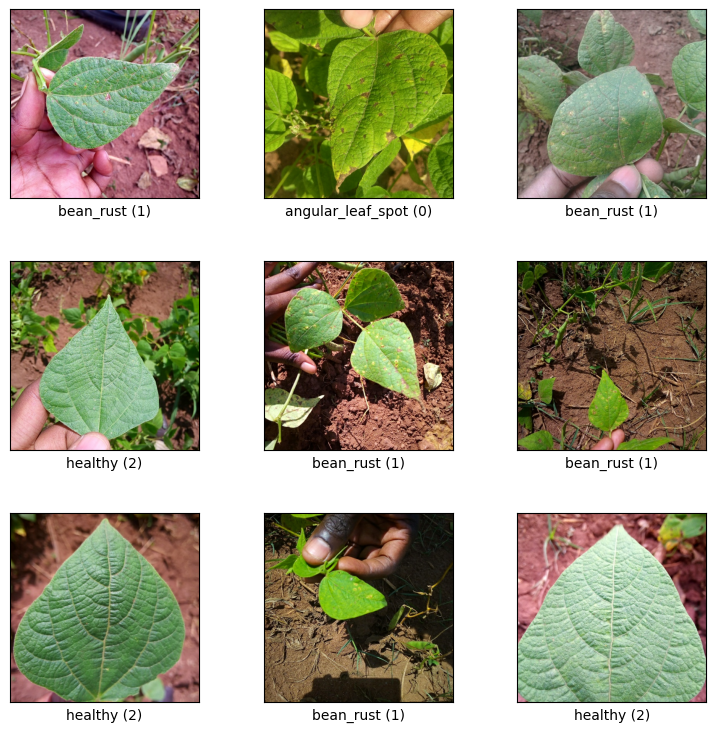

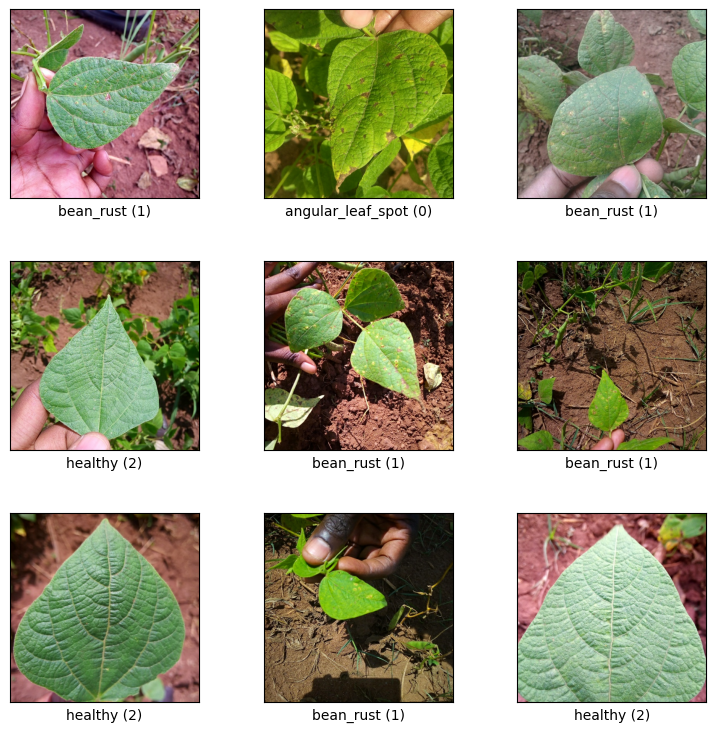

In [26]:
tfds.show_examples(ds_train, ds_info=ds_info)

In [14]:
df_train = tfds.as_dataframe(ds_train, ds_info=ds_info)

In [15]:
df_train.head()

,image,label
0,"[[[129, 118, 88], [95, 81, 54], [84, 66, 46], ...",1
1,"[[[64, 88, 14], [65, 89, 15], [66, 88, 15], [6...",0
2,"[[[93, 109, 83], [96, 112, 86], [97, 115, 91],...",1
3,"[[[78, 103, 46], [86, 102, 53], [103, 103, 67]...",2
4,"[[[149, 123, 134], [117, 91, 102], [119, 88, 1...",1


## 2. Preprocessing dataset
Includes: 
- resizing
- rotation
- batching

In [4]:
IMG_SIZE = 256
batch_size = 32
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

def resize_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.reshape(image, [-1])
    return image, label

In [5]:
train = (
    ds_train
    .shuffle(2000)
    .map(resize_rescale, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

test = (
    ds_test
    .shuffle(2000)
    .map(resize_rescale, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)